In [129]:
##-----Library Imports------##
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
import seaborn as sns

In [130]:
##-----STEP ONE: Import AirBnB Data-----##
data_path = "2-Feature Engineering - All Present.csv"
df = pd.read_csv(data_path)
pd.set_option('display.max_columns', None)
df.head(5)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores
0,3191,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...","There are pets on the property. One cat, who w...",The train station is about 400m from the cotta...,Fully self-contained cottage with separate ent...,"I live in the main house on the property, and ...","There is no smoking in the cottage, but you ca...",2008-10-21,I'm single and love to travel and meeting peop...,within an hour,100%,1.0,1.0,1.0,1.0,57.0,62,ZA,South Africa,-33.94739,18.47600,1,21,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Free...",661.0,2656.082216,211.000000,2,0.0,3,730,3,3,730,730,3.0,730.0,1,2,20,50,319,49,7,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0,1,0,moderate,0,0,1,1,0,0,0.610000,6.493754,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2663.663320
1,13044,JAMBO Guest House / Green Room,The Green Room at Jambo Guest House is a sligh...,"Jambo, which means hello in Swahili, is a gues...",The Green Room at Jambo Guest House is a sligh...,none,Green Point is a popular leisure district domi...,Very centrally situated and walking distance t...,A lot of big attractions are within walking di...,Guests will have access to their own private r...,Barry and Mina will be around to ensure you ha...,We expect our guests to be well behaved. Only ...,2009-11-02,We have been running multi Award Winning Jambo...,within an hour,100%,0.0,5.0,1.0,0.0,115.0,125,ZA,South Africa,-33.90771,18.40535,1,3,Hotel room,2,1.0,1.0,1.0,Real Bed,"TV,Wifi,Air conditioning,Breakfast,Free street...",2105.0,0.000000,0.000000,2,0.0,3,30,1,3,30,30,1.1,30.0,1,0,0,0,0,2,0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,1,0,strict_14_with_grace_period,0,0,5,0,0,0,0.020000,7.652071,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1459.786779
2,15007,Blaauwberg House,Welcome to our self-catering beach-front famil...,The house sleeps 6 and has all necessary ameni...,Welcome to our self-catering beach-front famil...,none,"Bloubergstrand is a lovely, cosy suburb near C...",Please note we do not provide beach towels at ...,We're located about 25 minutes drive out on th...,Guests have access to the full self-catering h...,"Ingrid, our booking manager, will meet you and...",Please ensure that arrangements are made for y...,2009-12-01,Proud to

In [131]:
##-----Rename neighbourhood for use with census data-----##
df = df.rename(columns={"neighbourhood_cleansed": "ward"})

### Novel Feature One: Demographic Data - Income###

In [132]:
##-----STEP TWO: Import Demographic Data-----##
data_path = "demographic_data.csv"
demographic = pd.read_csv(data_path)
pd.set_option('display.max_columns', None)
demographic.tail(10)

,ward,income
106,107,230700
107,108,29400
108,109,57300
109,110,57300
110,111,57300
111,112,230700
112,113,230700
113,114,14600
114,115,115100
115,116,57300


In [133]:
##--Merge datasets--##
merged = pd.merge(df, demographic, on='ward', how='outer')
merged.head(10)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,ward,zipcode,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores,income
0,3191.0,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...","There are pets on the property. One cat, who w...",The train station is about 400m from the cotta...,Fully self-contained cottage with separate ent...,"I live in the main house on the property, and ...","There is no smoking in the cottage, but you ca...",2008-10-21,I'm single and love to travel and meeting peop...,within an hour,100%,1.0,1.0,1.0,1.0,57.0,62.0,ZA,South Africa,-33.94739,18.47600,1.0,21.0,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Free...",661.0,2656.082216,211.000000,2.0,0.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,1.0,2.0,20.0,50.0,319.0,49.0,7.0,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0.0,1.0,0.0,moderate,0.0,0.0,1.0,1.0,0.0,0.0,0.610000,6.493754,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2663.663320,115100
1,26828.0,world cup accomodation,NaN,Situated close to the Green Point Stadium. Ava...,Situated close to the Green Point Stadium. Ava...,none,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-27,NaN,within an hour,unknown,0.0,1.0,1.0,0.0,57.0,97.0,ZA,South Africa,-33.93596,18.46945,0.0,1.0,Entire home/apt,3.0,1.0,3.0,2.0,Real Bed,NaN,6314.0,2656.082216,322.727352,1.0,0.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,1.0,30.0,60.0,90.0,365.0,0.0,0.0,94.834741,9.656356,9.572654,9.762728,9.769081,9.719734,9.537054,0.0,0.0,0.0,flexible,0.0,0.0,1.0,1.0,0.0,0.0,0.919543,8.750525,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,115100
2,120080.0,Green Elephant Backpackers Dorm Bed,NaN,Dorm Bed in 6 bed Dorm Close to Groote Schuur ...,Dorm Bed in 6 bed Dorm Close to Groote Schuur ...,none,NaN,NaN,NaN,NaN,NaN,"To comply with local laws, we require to scan ...",2011-05-19,I am Howard from The Green Elephant Guesthouse...,within a day,50-89%,0.0,7.0,1.0,0.0,57.0,97.0,ZA,South Africa,-33.93837,18.46609,1.0,23.0,Shared room,6.0,1.0,1.0,1.0,Real Bed,"Wifi,Kitchen,Washer / Dryer,Breakfast,Free str...",182.0,2656.082216,322.727352,1.0,185.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,1.0,30.0,60.0,90.0,365.0,35.0,8.0,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.0,0.0,0.0,strict_14_with_grace_period,0.0,0.0,7.0,0.0,4.0,3.0,0.350000,5.204007,0.0,0.0,

In [134]:
merged["log_price"].corr(merged["income"])

0.015956389879457484

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Income')]

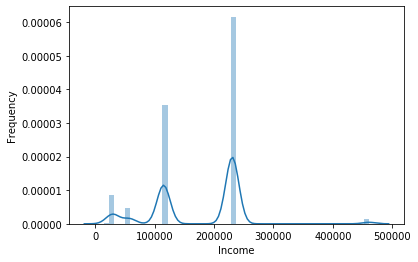

In [135]:
##----Plot distribution of income data----##
sns_plot = sns.distplot(merged["income"]);
sns_plot.set(xlabel = "Income", ylabel = "Frequency")

In [136]:
# Bin into four categories
merged["income"] = pd.cut(merged["income"], bins=[0, 29400, 57400, 116000, 240000, 500000], labels=['<30000', '57300', '115100', '230700', '>230700'], include_lowest=True)

# Converting to string
merged["income"] = merged["income"].astype('str')

# Replace nulls with 'unknown'
merged["income"].replace('nan', 'unknown', inplace=True)

# Category counts
merged["income"].value_counts()

230700     13467
115100      7734
<30000      1935
57300       1036
>230700      297
Name: income, dtype: int64

In [137]:
#one hot encode
dummy_variable_1=pd.get_dummies(merged["income"])
dummy_variable_1=dummy_variable_1.rename(columns={'<30000':'Low income', "57300":'Middle-Low Income', '115100':'Medium Income', '230700': 'High Income', '>230700': 'Exceedingly High Income'})
merged = pd.concat([merged, dummy_variable_1], axis=1)
merged.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,ward,zipcode,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores,income,Medium Income,High Income,Middle-Low Income,Low income,Exceedingly High Income
0,3191.0,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...","There are pets on the property. One cat, who w...",The train station is about 400m from the cotta...,Fully self-contained cottage with separate ent...,"I live in the main house on the property, and ...","There is no smoking in the cottage, but you ca...",2008-10-21,I'm single and love to travel and meeting peop...,within an hour,100%,1.0,1.0,1.0,1.0,57.0,62.0,ZA,South Africa,-33.94739,18.47600,1.0,21.0,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Free...",661.0,2656.082216,211.000000,2.0,0.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,1.0,2.0,20.0,50.0,319.0,49.0,7.0,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0.0,1.0,0.0,moderate,0.0,0.0,1.0,1.0,0.0,0.0,0.610000,6.493754,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2663.663320,115100,1,0,0,0,0
1,26828.0,world cup accomodation,NaN,Situated close to the Green Point Stadium. Ava...,Situated close to the Green Point Stadium. Ava...,none,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-27,NaN,within an hour,unknown,0.0,1.0,1.0,0.0,57.0,97.0,ZA,South Africa,-33.93596,18.46945,0.0,1.0,Entire home/apt,3.0,1.0,3.0,2.0,Real Bed,NaN,6314.0,2656.082216,322.727352,1.0,0.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,1.0,30.0,60.0,90.0,365.0,0.0,0.0,94.834741,9.656356,9.572654,9.762728,9.769081,9.719734,9.537054,0.0,0.0,0.0,flexible,0.0,0.0,1.0,1.0,0.0,0.0,0.919543,8.750525,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,115100,1,0,0,0,0
2,120080.0,Green Elephant Backpackers Dorm Bed,NaN,Dorm Bed in 6 bed Dorm Close to Groote Schuur ...,Dorm Bed in 6 bed Dorm Close to Groote Schuur ...,none,NaN,NaN,NaN,NaN,NaN,"To comply with local laws, we require to scan ...",2011-05-19,I am Howard from The Green Elephant Guesthouse...,within a day,50-89%,0.0,7.0,1.0,0.0,57.0,97.0,ZA,South Africa,-33.93837,18.46609,1.0,23.0,Shared room,6.0,1.0,1.0,1.0,Real Bed,"Wifi,Kitchen,Washer / Dryer,Breakfast,Free str...",182.0,2656.082216,322.727352,1.0,185.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,1.0,30.0,60.0,90.0,365.0,35.0,8.0,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,

In [138]:
#check correlation
merged["log_price"].corr(merged["Low income"])

0.0859722834479283

### Novel Feature Two: Supply and Demand###

In [139]:
#Supply and demand
ward_count = pd.DataFrame(df.ward.value_counts().reset_index())
ward_count.columns = ['ward', 'listing_count']
print(ward_count)

# merge 'df' & 'brands_count'
#merged = pd.merge(df, brands, on='brands')
#print(merged)
supply_demand_merged = pd.merge(df, ward_count, on='ward', how='outer')
supply_demand_merged.head(5)

     ward  listing_count
0   115.0           4307
1    54.0           3188
2    77.0           1965
3    23.0           1330
4    64.0           1149
..    ...            ...
93   78.0              1
94   99.0              1
95   34.0              1
96   52.0              1
97  106.0              1

[98 rows x 2 columns]


,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,ward,zipcode,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores,listing_count
0,3191,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...","There are pets on the property. One cat, who w...",The train station is about 400m from the cotta...,Fully self-contained cottage with separate ent...,"I live in the main house on the property, and ...","There is no smoking in the cottage, but you ca...",2008-10-21,I'm single and love to travel and meeting peop...,within an hour,100%,1.0,1.0,1.0,1.0,57.0,62,ZA,South Africa,-33.94739,18.47600,1,21,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Free...",661.0,2656.082216,211.000000,2,0.0,3,730,3,3,730,730,3.0,730.0,1,2,20,50,319,49,7,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0,1,0,moderate,0,0,1,1,0,0,0.610000,6.493754,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2663.663320,819
1,26828,world cup accomodation,NaN,Situated close to the Green Point Stadium. Ava...,Situated close to the Green Point Stadium. Ava...,none,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-27,NaN,within an hour,unknown,0.0,1.0,1.0,0.0,57.0,97,ZA,South Africa,-33.93596,18.46945,0,1,Entire home/apt,3,1.0,3.0,2.0,Real Bed,NaN,6314.0,2656.082216,322.727352,1,0.0,1,730,1,1,730,730,1.0,730.0,1,30,60,90,365,0,0,94.834741,9.656356,9.572654,9.762728,9.769081,9.719734,9.537054,0,0,0,flexible,0,0,1,1,0,0,0.919543,8.750525,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.000000,819
2,120080,Green Elephant Backpackers Dorm Bed,NaN,Dorm Bed in 6 bed Dorm Close to Groote Schuur ...,Dorm Bed in 6 bed Dorm Close to Groote Schuur ...,none,NaN,NaN,NaN,NaN,NaN,"To comply with local laws, we require to scan ...",2011-05-19,I am Howard from The Green Elephant Guesthouse...,within a day,50-89%,0.0,7.0,1.0,0.0,57.0,97,ZA,South Africa,-33.93837,18.46609,1,23,Shared room,6,1.0,1.0,1.0,Real Bed,"Wifi,Kitchen,Washer / Dryer,Breakfast,Free str...",182.0,2656.082216,322.727352,1,185.0,1,365,1,1,365,365,1.0,365.0,1,30,60,90,365,35,8,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0,0,0,strict_14_with_grace_period,0,0,7,0,4,3,0.350000,5.204007,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1261.356183,819
3,256720,Green Elephant Private Room,NaN,Closest Backpackers to Groote Schuur Hospital ...,Closest Backpackers to Groote Schuur Hospital ...,none,NaN,NaN,NaN,NaN,NaN,"To comply with local laws, we requir

In [140]:
#check correlation
supply_demand_merged["log_price"].corr(supply_demand_merged["listing_count"])

0.17505629560865626

In [141]:
#listings count per ward
ward_count.head(20)

,ward,listing_count
0,115.0,4307
1,54.0,3188
2,77.0,1965
3,23.0,1330
4,64.0,1149
5,74.0,1130
6,61.0,947
7,57.0,819
8,59.0,769
9,62.0,730


In [142]:
##----Create dataset with new spatial features----##
df_spatial = merged[["log_price", "ward", "Low income","Middle-Low Income","Medium Income","High Income", "Exceedingly High Income"]]
#df_spatial["listing_count"] = supply_demand_merged["listing_count"]
#df_spatial = pd.merge(df_spatial, supply_demand_merged[["ward", "listing_count"]], on='ward', how='outer')
df_spatial_new = pd.merge(df_spatial, ward_count, on='ward', how='outer')
df_spatial_new.head(10)

,log_price,ward,Low income,Middle-Low Income,Medium Income,High Income,Exceedingly High Income,listing_count
0,6.493754,57.0,0,0,1,0,0,819.0
1,8.750525,57.0,0,0,1,0,0,819.0
2,5.204007,57.0,0,0,1,0,0,819.0
3,6.304449,57.0,0,0,1,0,0,819.0
4,5.204007,57.0,0,0,1,0,0,819.0
5,6.469250,57.0,0,0,1,0,0,819.0
6,5.347108,57.0,0,0,1,0,0,819.0
7,6.469250,57.0,0,0,1,0,0,819.0
8,6.329721,57.0,0,0,1,0,0,819.0
9,7.022868,57.0,0,0,1,0,0,819.0


In [143]:
df_spatial_new["log_price"].corr(df_spatial_new["Middle-Low Income"])

-0.055562496575872575

In [144]:
df_spatial_new["log_price"].corr(df_spatial_new["listing_count"])

0.17505629560865626

In [145]:
df_spatial_new.to_csv("3- Spatial Features - 1+2.csv", index=False)

### Novel Feature Three: Distance to Landmarks###

In [146]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode

In [147]:
gis = GIS('http://www.arcgis.com', 'SamBall999', 'taylorswift13')

#### Use this block to experiment with what you can get from arcgis

In [148]:
x = 18.379348 #coord33.9803° S, 18.4640° E
y = -33.951011 #coord
diff = 0.5 #tolerance to above coords in degrees (1deg=110km, 0.1deg=11km, 0.01deg=1.1km)
extent = {"xmin": x-diff,"xmax":x+diff, "ymin": y-diff,"ymax":y+diff}
geocode_fs = geocode("hudsons", 
                     #POI['extent'], 
                     extent,
                     location=[x, y],
                     #category="attraction",
                     #out_fields="Place_addr, PlaceName",
                     #distance=1000000,
                     max_locations=500,
                     as_featureset=True)

geocode_df = geocode_fs.df
#geocode_df.head(20)

#print(geocode_df.head(1)["Distance"])
geocode_df

,Loc_name,Status,Score,Match_addr,LongLabel,ShortLabel,Addr_type,Type,PlaceName,Place_addr,Phone,URL,Rank,AddBldg,AddNum,AddNumFrom,AddNumTo,AddRange,Side,StPreDir,StPreType,StName,StType,StDir,BldgType,BldgName,LevelType,LevelName,UnitType,UnitName,SubAddr,StAddr,Block,Sector,Nbrhd,District,City,MetroArea,Subregion,Region,RegionAbbr,Territory,Zone,Postal,PostalExt,Country,LangCode,Distance,X,Y,DisplayX,DisplayY,Xmin,Xmax,Ymin,Ymax,ExInfo,OBJECTID,SHAPE
0,World,M,99.99,Hudson's,"Hudson's, Kloof St, Gardens, Cape Town, Wester...",Hudson's,POI,Burgers,Hudson's,"Kloof St, Cape Town, Western Cape, 8001",+27 214265974,,19,,,,,,,,,Kloof,St,,,,,,,,,Kloof St,,,,Gardens,Cape Town,,Cape Town,Western Cape,Western Cape,,,8001,,ZAF,ENG,3754.846775,18.41099,-33.92977,18.41099,-33.92977,18.40599,18.41599,-33.93477,-33.92477,,1,"{'x': 18.410990000000027, 'y': -33.92976999999..."
1,World,M,100.00,Hudsons,"Hudsons, St Andrews Rd, Rondebosch, Cape Town,...",Hudsons,POI,International Food,Hudsons,"St Andrews Rd, Cape Town, Western Cape, 7700",+27 214331496,,19,,,,,,,,,St Andrews,Rd,,,,,,,,,St Andrews Rd,,,,Rondebosch,Cape Town,,Cape Town,Western Cape,Western Cape,,,7700,,ZAF,ENG,8594.280156,18.47162,-33.96178,18.47162,-33.96178,18.46662,18.47662,-33.96678,-33.95678,,2,"{'x': 18.47162000000003, 'y': -33.961779999999..."
2,World,M,99.99,Hudson's,"Hudson's, The Bonnie Mile, Cape Winelands, Wes...",Hudson's,POI,Continental Food,Hudson's,"Stellenbosch, Western Cape",+27 218813590,http://www.theburgerjoint.co.za,19,,,,,,,,,,,,,,,,,,,,,,,The Bonnie Mile,Stellenbosch,,Cape Winelands,Western Cape,Western Cape,,,,,ZAF,ENG,39316.284799,18.80550,-33.95930,18.80550,-33.95930,18.80050,18.81050,-33.96430,-33.95430,,3,"{'x': 18.805500000000052, 'y': -33.95929999999..."


#### Use these blocks to experiment on dataset

In [149]:
#df_in = pd.read_csv("4-Feature Selection - With Outliers - 34 Features - Small Sample 2400.csv")
df_final = pd.read_csv("2-Feature Engineering - All Present.csv")
df_final = df_final.head(200) #test on sample
print(df_final.shape)

(200, 97)


In [150]:
#find distance between each listing and a given landmark/facility (shown: "beach")
#repeated for table mountain, promenade
for index, row in df_final.iterrows():
    print(index,end=" ")
    x = row['longitude']
    y = row['latitude']
    diff = 0.9 #0.01 #0.005
    extent = {"xmin": x-diff,"xmax":x+diff, "ymin": y-diff,"ymax":y+diff}
    geocode_fs = geocode("beach", extent,location=[x, y], out_fields="PlaceName,Distance", max_locations=50,as_featureset=True)
    geocode_df = geocode_fs.df
    #df_in.loc[index,"num_restaurants"] = len(geocode_fs)
    df_final.loc[index,"beach_dist"] = geocode_df.loc[0,"Distance"]


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 

In [151]:
print(df_final["log_price"].corr(df_final["beach_dist"]))
df_final.tail(50)
#print(df_final.shape)

-0.14988395081564662


,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores,beach_dist
150,675177,Stunning Beachfront Penthouse. Spectacular Views!,Luxurious Mouille Point Penthouse with wrap-ar...,This penthouse apartment on Mouille Point beac...,Luxurious Mouille Point Penthouse with wrap-ar...,none,The garden terrace with patio furniture and pl...,– Level: 5th floor – Access: Elevator and stai...,Very central location within walking distance ...,Entire apartment and parking bay is for guest ...,I have a managing agency that's always availab...,Have a wonderful stay and enjoy yourselves! BU...,2012-06-01,I live in Cape Town and love it! I'd like to h...,within an hour,100%,0.0,75.0,1.0,0.0,115.0,119,ZA,South Africa,-33.90081,18.40596,0,1,Entire home/apt,4,2.0,2.0,3.0,Real Bed,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Free...",2554.0,3000.000000,450.000000,1,0.0,3,1124,2,3,1125,1125,2.7,1125.0,1,13,13,43,240,16,5,89.000000,9.000000,9.000000,9.000000,9.000000,10.000000,9.000000,0,1,0,strict_14_with_grace_period,0,0,73,73,0,0,0.400000,7.845416,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2232.741524,701.510850
151,678993,Bay Leaf Cottage,NaN,Bay Leaf Cottage is located in the trendy subu...,Bay Leaf Cottage is located in the trendy subu...,none,NaN,NaN,NaN,NaN,I am available by phone and conveniently live ...,1. Please wash your own dishes. The Cottage ...,2012-09-03,"Hi, I am a born and bred Capetonian and have l...",within an hour,100%,1.0,1.0,1.0,0.0,57.0,97,ZA,South Africa,-33.93607,18.46662,1,25,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"TV,Cable TV,Wifi,Kitchen,Free parking on premi...",702.0,0.000000,210.000000,2,140.0,2,180,2,2,180,180,2.0,180.0,1,3,21,51,326,39,5,98.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0,0,0,strict_14_with_grace_period,0,0,1,1,0,0,0.470000,6.553933,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,3454.712481,7425.067098
152,686495,Perfectly positioned Bakoven home,"Perfectly positioned Bakoven home, within 5 mi...","Perfectly positioned, characterful and artisti...","Perfectly positioned Bakoven home, within 5 mi...",none,"Great access to beaches, mountain and wonderfu...",We are set back from the main road but have ea...,"Within walking distance to beach, restaurants ...",The entire property is available.,NaN,Strictly no pets. Strictly no smoking.,2012-09-09,"I am an artist.\r\nI love books, travel, good ...",within a few hours,100%,0.0,2.0,1.0,1.0,54.0,123,ZA,South Africa,-33.96057,18.37866,0,40,Entire home/apt,5,2.0,3.0,3.0,Real Bed,"TV,Cable TV,Internet,Wifi,

#### Count number of facilities in radius

In [152]:
#Create alternate that counts number of facilities in radius
#feature = "Wine" #0.05 - 0.0433 corr
#feature = "Wine" #0.02 - 0.08103 corr
#feature = "Promenade"
feature = "Wine"

#feature = "Restaurant" 

for index, row in df_final.iterrows():
    print(index,end=" ")
    x = row['longitude']
    y = row['latitude']
    diff = 0.02 
    extent = {"xmin": x-diff,"xmax":x+diff, "ymin": y-diff,"ymax":y+diff}
    geocode_fs = geocode(feature, extent,location=[x, y], out_fields="PlaceName,Distance", max_locations=50,as_featureset=True)
    
    if(len(geocode_fs)==0):
        df_final.loc[index,feature] = 0
    else:
        geocode_df = geocode_fs.df
        df_final.loc[index,feature] = len(geocode_fs)
        #df_in.loc[index,feature] = geocode_df.loc[0,"Distance"]


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 

In [153]:
df_final.to_csv("3-Spatial Features - 3.csv", index=False)